# Google Drive
Se monta el Drive para importar y guardar los datos y modelos.

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()

gauth.LoadCredentialsFile("./credentials/mycreds.txt")
if gauth.credentials is None:
    # Authenticate if they're not there
    gauth.LocalWebserverAuth()
elif gauth.access_token_expired:
    # Refresh them if expired
    gauth.Refresh()
else:
    # Initialize the saved creds
    gauth.Authorize()
# Save the current credentials to a file
gauth.SaveCredentialsFile("./credentials/mycreds.txt")

drive = GoogleDrive(gauth)

 metodo para guardar en el hash.

In [2]:
def agregar_hash(root):
    file_list = drive.ListFile({'q': "'"+str(d[root])+"' in parents and trashed=false"}).GetList()
    for file1 in file_list:
        name=file1['title']
        d[name]=file1['id'] 
        if '.' not in file1['title']:
            agregar_hash(name)

 Se guarda en un hash el id de cada archivo, teniendo como key su nombre

In [3]:
d={}    

file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
    name=file1['title']
    if name=='Proyecto Especial Italiano':
        d[file1['title']]=file1['id']

agregar_hash('Proyecto Especial Italiano')
print(len(d))
print('Quedaron guardados')

666
Quedaron guardados


 metodo para acceso a archivos de drive.

In [4]:
def guardarLocalmente(nombre,ruta='./drive/'):
    id=d[nombre]
    file = drive.CreateFile({'id': id})
    file.GetContentFile(ruta+nombre)

# Importar

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [23]:
import matplotlib.pyplot as plt

# Tensor Flow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import AveragePooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Model
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

# Recopilacion de datos
import xml.dom.minidom
from scipy.io import wavfile
import numpy as np

# Para el preprocesamiento
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from collections import Counter

import librosa
import progressbar

# Import libraries 
import librosa.display
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
from scipy import signal
from scipy.fft import fftshift

#Redes neuronales sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.utils.class_weight import compute_class_weight

import psutil

# Funciones Resultados

In [9]:
# De los creadores de EntrenamientoModelo*
def graficarMatrizConfusion(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  

  plt.figure(figsize=(8,8))

  ax = sns.heatmap(cm, annot = True, cbar = False);
      
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')
      
  plt.xlabel("Clase Prediccion")
  plt.ylabel("Clase Verdadera")
  plt.title("Matriz de Confusion")

  plt.show()
  

# Cargar y guardar modelos

In [10]:
# De los creadores de EntrenamientoModelo*
#Estas funciones permiten guardar y cargar un modelo, a partir de las rutas indicadas por parametro.
def guardarModelo(pModelo, pRutaModelo, pRutaPesos, pRutaDiagrama):
  modelo_json = pModelo.to_json()

  with open(pRutaModelo, "w") as archivo_json:
      archivo_json.write(modelo_json)

  pModelo.save_weights(pRutaPesos)

  plot_model(pModelo, to_file = pRutaDiagrama, show_shapes = True)

def cargarModelo(pRutaModelo, pRutaPesos):
  archivo_json = open(pRutaModelo, 'r')
  modelo_json = archivo_json.read()
  archivo_json.close()
  modelo = model_from_json(modelo_json)

  modelo.load_weights(pRutaPesos)

  return modelo

Guardar modelo

In [ ]:
Nombre = "Casti"
Numero = "1"
#utaModelo = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/Modelo_"+Nombre+"_"+Numero+".json"
#rutaPesos = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/Pesos_Modelo_"+Nombre+"_"+Numero+".h5"
#rutaDiagrama = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/Diagrama_Modelo_"+Nombre+"_"+Numero+".png"

#guardarModelo(modelo1, rutaModelo, rutaPesos, rutaDiagrama)


Cargar Modelo

In [ ]:
Nombre = "Casti"
Numero = "1"
#rutaModelo = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/Modelo_"+Nombre+"_"+Numero+".json"
#rutaPesos =  "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/Pesos_Modelo_"+Nombre+"_"+Numero+".h5"
#modelo1 = cargarModelo(pRutaModelo=rutaModelo, pRutaPesos=rutaPesos)

# Recopilación de Datos

Monitoreo estado ram
Datos Espectograma recoleccion de variables x x2 y y

In [24]:
def monitoreo_ram():
    vmem=psutil.virtual_memory()
    if vmem.available<4000000000:
        return False
    else:
        return True

def dar_ruta(carpeta,features,str_variable, Inicial_pNXML, Final_pNXML, Inicial_nAudios, Final_nAudios, ventana_Tiempo, 
             sample_rate, Nombre, Sin_Background, Solo_Background, Espectogram_, MFCC_):
    if features: Features_or_raw = "_features/"
    else: Features_or_raw = "_raw_conv/"
    ventana_Tiempo_String_ = str(ventana_Tiempo).split('.')[1]
    sample_rate_String = str(sample_rate)
    if Sin_Background: Back = "_SIN_BACK"
    elif Solo_Background: Back = "_SOLO_BACK"
    else: Back = ""
    if Espectogram_: Esp_o_Mfcc = "Spectopgram"
    elif MFCC_:Esp_o_Mfcc = "MFCC"
    else: Esp_o_Mfcc = ""

    ruta = carpeta+Features_or_raw+str_variable\
           +str(Inicial_pNXML)+"-"+ str(Final_pNXML)+ "_XML_"+str(Inicial_nAudios)+"-"+ str(Final_nAudios)\
           +"_Audios_"+ventana_Tiempo_String_+"s_"+ sample_rate_String + "_"+Nombre+  Back+ "_" + Esp_o_Mfcc
    
    return ruta
    #np.save(ruta, variable)
  
def Crear_Datos_MFCC_o_Espectogram(pX,sr_, window_length_stft, Step_size_stft,MFCC, Espectogram,ventana_Tiempo):
  contador=0
  with progressbar.ProgressBar(max_value=(len(pX))) as bar:
    if Espectogram:
      if ventana_Tiempo>=0.05 and window_length_stft>=0.025: ps = librosa.feature.melspectrogram(y=pX[0],  sr=sr_, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_))
      else: ps = librosa.feature.melspectrogram(y=pX[0],  sr=sr_)
    elif MFCC:
      if ventana_Tiempo>=0.05 and window_length_stft>=0.03125: ps = librosa.feature.mfcc(y=pX[0], sr=sr_, n_mfcc=13, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_), htk=True )
      else: ps = librosa.feature.mfcc(y=pX[0], sr=sr_, n_mfcc=13)

    x_2 = np.zeros((len(pX)+1,len(ps),len(ps[0])))
    for i in range(0,len(pX)):
      if Espectogram:
        if ventana_Tiempo>=0.05 and window_length_stft>=0.025: ps = librosa.feature.melspectrogram(y=pX[i],  sr=sr_, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_))
        else: ps = librosa.feature.melspectrogram(y=pX[i],  sr=sr_)
        ps = librosa.power_to_db(ps, ref=np.max)
      elif MFCC:
        if ventana_Tiempo>=0.05 and window_length_stft>=0.03125: ps = librosa.feature.mfcc(y=pX[i], sr=sr_, n_mfcc=13, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_), htk=True )
        else: ps = librosa.feature.mfcc(y=pX[i], sr=sr_, n_mfcc=13)
      x_2[i] = ps
      contador+=1
      bar.update(contador) #Se actualiza la barra de progreso
  x_2 = x_2[0:-1,:]
  return x_2

def ObtenerSonidos(nombre,Inicial_pNXML,   Final_pNXML,    Inicial_nAudios,               Final_nAudios,
        ventana_Tiempo=0.1,         salto_de_ventana=4,    Calcular_Features=False,       Sin_Background = False,
        rutaDatosXML="./drive/xml/", rutaDatosParciales ="./drive/parciales/",
        rutaDatosSounds ="./drive/sounds/", Solo_Background = False,
        sample_rate = 22050, window_length_stft= 0.032, Step_size_stft=0.01,
        guardarLocal=False,MFCC=False,Espectogram=False):
    
    NMV = round(ventana_Tiempo_*sample_rate_) # Numero de muestras por ventana
    window = np.hamming(NMV) # se crea la ventana de hamming
    numero_magico=1350000000 # Depende de la ram del computador 1.35G es maso unas 64GB de ram en el peor caso :v
    z=0 # Indica si los datos se guardaron en uno o varios archivos. si z se queda en 0 solo se guardo un archivo.
    if guardarLocal:
        datos_x_totales, dato_x2_totales ,datos_y_totales=[0],[0],[0]
    else:
        NMV = round(ventana_Tiempo*sample_rate) # Numero de muestras por ventana
        NMV_advance = round(NMV/salto_de_ventana) # Numero de muestras por las cuales se avanza
        if Calcular_Features: 
            datos_x_totales=np.zeros((1,312)) 
        else: 
            datos_x_totales=np.zeros((int(numero_magico/NMV),NMV))
        datos_y_totales=np.zeros(int(numero_magico/NMV))
    contador=0

    with progressbar.ProgressBar(max_value=(Final_pNXML-Inicial_pNXML+1)*(Final_nAudios-Inicial_nAudios+1)) as bar:
        longitud_actual = 0
        for i in range(Inicial_pNXML_,(Final_pNXML_+1)):
        
            if i<10:  h="0" # Se hace esto debido que en los audios hay elementos 00001_01 y 00010_1
            else: h=""
        
            archivo_xml="000" + h + str(i) + ".xml"
            if guardarLocal:
                guardarLocalmente(archivo_xml,rutaDatosXML)
            else:
                doc =xml.dom.minidom.parse(rutaDatosXML + archivo_xml)
                start = doc.getElementsByTagName("STARTSECOND") #Vector que contiene el tiempo en segundos de inicio de todos los eventos 
                finish = doc.getElementsByTagName("ENDSECOND") #Vector que contiene el tiempo en segundos de finalizacion de todos los eventos
                ID = doc.getElementsByTagName("CLASS_ID") # Vector que contiene la etiqueta de cada uno de los eventos
                events = doc.getElementsByTagName("events") # Indica informacion de todos los eventos en un archivo xml (tamaño)
                a, b, c, d=(events[0].attributes["size"].value) #Se obtiene el numero de eventos en un audio
                nEventos = int(c+d) # numero de eventos en un audio

            for a in range(Inicial_nAudios, (Final_nAudios)+1):# Numero de audios por xml
                if a<2: # Se hace esto debido que en los audios hay elementos 00001_01 y 00010_1
                    r = "0"
                    t=str(a)
                else:
                    t=str(a-1)
                    r=""
                archivo_audio='000' + h + str(i) +'_'+ r + t +'.wav'
                if guardarLocal:
                    guardarLocalmente(archivo_audio,rutaDatosSounds)
                else:
                    frameData, fs = librosa.load(rutaDatosSounds + archivo_audio, sr=sample_rate, res_type='kaiser_fast') #Audio seleccionado
                    datos_x = (librosa.util.frame(frameData, frame_length=NMV, hop_length=NMV_advance)).T # Reorganiza los datos dándole saltos de tiempo de NMV_advance y el número de muestras por ventana NMV
                    datos_y = np.zeros(len(frameData)) #Etiquetas de cada uno de los datos, los datos no asignados serán 0 y corresponderan a sonido ambiente

                    for j in range(0,nEventos): # Se recorre el numero de eventos para cada xml
                        startFrame = float(str(start[j].firstChild.data))*fs #Posicion inicial de evento con respecto a frameData
                        endFrame = float(str(finish[j].firstChild.data))*fs #Posicion final de evento con respecto a frameData
                        label = ID[j].firstChild.data #etiqueta del evento
                        datos_y[round(startFrame):round(endFrame)]=int(label) # Se asigna la etiqueta a cada uno de los datos recopilados

                    datos_y = (((stats.mode(librosa.util.frame(datos_y, frame_length=NMV, hop_length=NMV_advance)))[0]).T)# Con esto se asigna la etiqueta a datos desplazados en el tiempo
                    datos_y = np.reshape(datos_y, (-1), 'F')

                    if Sin_Background: # Si se quieren datos sin background
                        datos_x = datos_x[datos_y!=0,:]
                        datos_y =  datos_y[datos_y!=0]
          
                    if Solo_Background:
                        datos_x = (datos_x[datos_y==0,:])[0:round(len(datos_y[datos_y==0])),:]
                        datos_y =  (datos_y[datos_y==0])[0:round(len(datos_y[datos_y==0]))]

                    longitud_siguiente = longitud_actual + len(datos_y)
                    datos_x_totales[longitud_actual:longitud_siguiente,:] = datos_x
                    datos_y_totales[longitud_actual:longitud_siguiente] = datos_y
                    if monitoreo_ram(): # continua ejecucion normal si hay ram suficiente
                        longitud_actual = longitud_siguiente
                    else: # Se va a acabar la memoria guarda los resultados parciales
                        datos_x_totales = datos_x_totales[0:longitud_siguiente,:]
                        datos_x_totales = datos_x_totales*window #Se pasa cada uno de los datos por una ventana de hamming
                        datos_y_totales = datos_y_totales[0:longitud_siguiente]
                        datos_y_totales[datos_y_totales==4] = 1
                        ruta = dar_ruta(rutaDatosParciales,Calcular_Features,'x_'+str(z)+'_', Inicial_pNXML, Final_pNXML, Inicial_nAudios, 
                                Final_nAudios, ventana_Tiempo, sample_rate, nombre, Sin_Background, Solo_Background, 
                                False, False)
                        np.save(ruta,datos_x_totales)
                        ruta = dar_ruta(rutaDatosParciales,Calcular_Features,'y_'+str(z)+'_', Inicial_pNXML, Final_pNXML, Inicial_nAudios, 
                                Final_nAudios, ventana_Tiempo, sample_rate, nombre, Sin_Background, Solo_Background, 
                                False, False)
                        np.save(ruta,datos_y_totales)
                        
                        if MFCC or Espectogram: # Se crea el Spectogram para cada dato
                            x2 = Crear_Datos_MFCC_o_Espectogram(datos_x_totales ,fs, window_length_stft_, Step_size_stft_,MFCC_, Espectogram_, ventana_Tiempo_)
                            ruta = dar_ruta(rutaDatosParciales_,Features_,'x2_', Inicial_pNXML_, Final_pNXML_, Inicial_nAudios_, 
                                Final_nAudios_, ventana_Tiempo_, sample_rate_, nombre_, Sin_Background_, Solo_Background_, Espectogram_, MFCC_)
                            np.save(ruta,x2)
                        x2=None
        
                        z+=1
                        longitud_actual = 0
                        if Calcular_Features: 
                            datos_x_totales=np.zeros((1,312)) 
                        else: 
                            datos_x_totales=np.zeros((int(numero_magico/NMV),NMV))
                        datos_y_totales=np.zeros(int(numero_magico/NMV))
          
                contador+=1
                bar.update(contador) #Se actualiza la barra de progreso
    
    if not guardarLocal:
        datos_x_totales = datos_x_totales[0:longitud_siguiente,:]
        datos_x_totales = datos_x_totales*window #Se pasa cada uno de los datos por una ventana de hamming
        datos_y_totales = datos_y_totales[0:longitud_siguiente]
        datos_y_totales[datos_y_totales==4] = 1
        
        ruta = dar_ruta(rutaDatosParciales,Calcular_Features,'x_'+str(z)+'_', Inicial_pNXML, Final_pNXML, Inicial_nAudios, 
            Final_nAudios, ventana_Tiempo, sample_rate, nombre, Sin_Background, Solo_Background, 
            False, False)
        np.save(ruta,datos_x_totales)
        ruta = dar_ruta(rutaDatosParciales,Calcular_Features,'y_'+str(z)+'_', Inicial_pNXML, Final_pNXML, Inicial_nAudios, 
            Final_nAudios, ventana_Tiempo, sample_rate, nombre, Sin_Background, Solo_Background, 
            False, False)
        np.save(ruta,datos_y_totales)
        
        if MFCC or Espectogram: # Se crea el Spectogram para cada dato
            x2 = Crear_Datos_MFCC_o_Espectogram(datos_x_totales ,fs, window_length_stft_, Step_size_stft_,MFCC_, Espectogram_, ventana_Tiempo_)
            ruta = dar_ruta(rutaDatosParciales_,Features_,'x2_', Inicial_pNXML_, Final_pNXML_, Inicial_nAudios_, 
                Final_nAudios_, ventana_Tiempo_, sample_rate_, nombre_, Sin_Background_, Solo_Background_, Espectogram_, MFCC_)
            np.save(ruta,x2)
    
        z+=1
        longitud_actual = 0
        datos_x_totales=None
        datos_y_totales=None
        x2=None
        
    return z, fs

Lo siguiente permite obtener los datos de sonido y guardarlos. Al final se obtiene y se guarda lo siguiente:

x: Vector que contiene datos crudos de sonido pasados por una ventana de hammin

x2: Vector que contiene MFCC o Espectogramas

y: Vector que contiene las etiquetas de todos los datos

In [25]:
ventana_Tiempo_ = 0.100 # La ventana de tiempo de cada muestra (XX_ms) 
salto_de_ventana_ = 4  # Corrimiento en tiempo (XXms/4)
sample_rate_ = 22050 # Tasa remuestreo
# Si se está obteniendo el espectogramo, el valor de la ventana no puede ser menor a 0.025s
# Si se está obteniendo el MFCC, el valor de la ventana no puede ser menor a 0.03125s
window_length_stft_ = 0.025 # Ventana de tiempo para la short-Time Fourier Transform
Step_size_stft_ = 0.010 # Saltos el en tiempo para la transformada de Fourier, fíjenlo menor a la ventana stft, si quieren pueden aumentar

Sin_Background_ = False # True: no se obtienen datos de background; False: No se obtienen datos de background  NO MOVER
Features_ = False # Obtener o no features NO MOVER
Inicial_pNXML_ = 1 # Número inicial de archivos XML utilizados  NO MOVER, a menos de que se quiera obtener 45 a 55
Final_pNXML_ = 10 # Número final de archivos XML utilizados  NO MOVER, a menos de que se quiera obtener 45 a 55
Inicial_nAudios_ = 0 # Número inicial de audios que se obtendrán (esto no aplica para nuestros audios)  NO MOVER
Final_nAudios_ = 7 # Número final de audios que se obtendrán (esto no aplica para nuestros audios)  NO MOVER
rutaDatosXML_ = "./drive/xml/" #Ruta para encontrar archivos xml  NO MOVER
rutaDatosSounds_ = "./drive/sounds/"  #Ruta para encontrar Audios  NO MOVER
ruta_resultados = './drive/Datos_Procesados/datos'
rutaDatosParciales_ ="./drive/parciales/datos"
Solo_Background_ = False #Solo obtener datos de background  NO MOVER
nombre_ = "Casti" ## PONER NOMBRE QUIEN REALIZA LA PRUEBA
#a,b,c,d,e=str(ventana_Tiempo_)
guardarLocal_=True

# Si ambos son True, se obtendrá únicamente el espectogram
Espectogram_ = True #Calcular el espectograma
MFCC_ = False #Calcular el MFCC

z,fs=ObtenerSonidos(nombre=nombre_, Inicial_pNXML = Inicial_pNXML_, Final_pNXML = Final_pNXML_, 
    Inicial_nAudios = Inicial_nAudios_, Final_nAudios = Final_nAudios_, ventana_Tiempo=ventana_Tiempo_,
    salto_de_ventana=salto_de_ventana_, Calcular_Features=Features_, Sin_Background =Sin_Background_,
    rutaDatosXML = rutaDatosXML_, rutaDatosParciales=rutaDatosParciales_,rutaDatosSounds=rutaDatosSounds_, 
    Solo_Background = Solo_Background_, sample_rate=sample_rate_, window_length_stft= window_length_stft_,
    Step_size_stft=Step_size_stft_,guardarLocal=guardarLocal_,MFCC=MFCC_,Espectogram=Espectogram_)

print("Se acabo")

TypeError: __init__() got an unexpected keyword argument 'max_value'

El objetivo de la siguiente función es acoplar los datos de los descriptores o de los datos raw obtenidos en un solo vector.

# Preprocesamiento de los datos
Aquí se debe realizar todo el preprocesamiento de los datos. Se debe considerar el desbalance en los datos de entrenamiento. Primero se separan los datos de entrenamiento y validación.


Se extraen los datos guardados:

Primero se juntan los arreglos de x y y x2 para que estos alcancen el mayor tamaño posible sin superar la memoria 
RAM maxima de la maquina

In [16]:
Numero = "100"
Nombre = "Casti"
Esp_o_Mfcc = "Spectopgram"
sample_rate = "22050"
muestra = '1'
final=''

vmem=psutil.virtual_memory()
print(vmem)
x=[]
y=[]
x2=[]

yTotal=[]
for i in range(z):
    ruta = dar_ruta(rutaDatosParciales_,Features_,'y_'+str(i)+'_', Inicial_pNXML_, Final_pNXML_, Inicial_nAudios_, 
        Final_nAudios_, ventana_Tiempo_, sample_rate_, nombre_, Sin_Background_, Solo_Background_, False, False)
    y=np.load(ruta+'.npy')
    yTotal.concatenate(y)
ruta = dar_ruta(ruta_resultados,Features_,'y_', Inicial_pNXML_, Final_pNXML_, Inicial_nAudios_, 
    Final_nAudios_, ventana_Tiempo_, sample_rate_, nombre_, Sin_Background_, Solo_Background_, False, False)
np.save(ruta,y)
y=None
    
#while vmem.available>vmem.total*.5:
#    xnew=np.load("./drive/parciales/Datos_raw_conv/x_"+muestra+"_1-10_XML_0-7_Audios_"+Numero+"s_"+sample_rate + "_"+Nombre+".npy")
#    x.concatenate(xnew)
#    x=np.r_(xnew,x)

#while vmem.available>vmem.total*.7:
#    ynew=np.load("./drive/parciales/Datos_raw_conv/y_"+muestra+"_1-10_XML_0-7_Audios_"+Numero+"s_"+sample_rate + "_"+Nombre+".npy")
#    y=[x,ynew]
    
#while vmem.available>vmem.total*.9:
#    x2new=np.load("./drive/parciales/Datos_raw_conv/x2_"+muestra+"_1-10_XML_0-7_Audios_"+Numero+"s_"+sample_rate + "_"+Nombre+".npy")
#    x2=[x2,x2new]
    

svmem(total=16777207808, available=10187374592, percent=39.3, used=6215487488, free=6452203520, active=6215368704, inactive=3414327296, buffers=396562432, cached=3712954368, shared=30916608, slab=487657472)


Extraer datos específicos

In [0]:
Numero = "100"
Nombre = "Casti"
Esp_o_Mfcc = "Spectopgram"
sample_rate = "22050"
muestra = '1'

x=np.load("./drive/parciales/Datos_raw_conv/x_"+muestra+"_1-10_XML_0-7_Audios_"+Numero+"s_"+sample_rate + "_"+Nombre+".npy")
y=np.load("./drive/parciales/Datos_raw_conv/y_"+muestra+"_1-10_XML_0-7_Audios_"+Numero+"s_"+sample_rate + "_"+Nombre+".npy")
x2=np.load("./drive/parciales/Datos_raw_conv/x2_"+muestra+"_1-10_XML_0-7_Audios_"+Numero+"s_"+sample_rate + "_"+Nombre+".npy")

#x = np.load("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos raw_Conv/x_1-10_XML_0-7_Audios_"+Numero+"s_"+sample_rate_String + "_"+Nombre+".npy")
#x2 = np.load("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos raw_Conv/x2_1-10_XML_0-7_Audios_"+Numero+"s_"+sample_rate_String + "_"+Nombre+"_"+Esp_o_Mfcc+".npy")
#y = np.load("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos raw_Conv/y_1-10_XML_0-7_Audios_"+Numero+"s_"+sample_rate_String + "_"+Nombre+".npy")

In [0]:
y.shape

La siguiente celda permite dividir los datos en datos de entrenamiento y datos de validación

In [0]:
x_train_1, x_test_1, y_train, y_test = train_test_split(x, y , random_state = 0, test_size=0.20)
x=[]
x_train_2, x_test_2, y_train, y_test = train_test_split(x2, y, random_state = 0, test_size=0.20)
x2 = []
y=[]

A continuación se muestra el número de datos de cada etiqueta para datos de entrenamiento.

In [0]:
print('Original dataset shape %s' % Counter(y_train))

Si se desean realizar pruebas sin datos de background ejecutar el siguiente código:

In [0]:
#x_train=x_train[y_train!=0]
#y_train=y_train[y_train!=0]
#x_test=x_test[y_test!=1]
#y_test=y_test[y_test!=1]
#y_test[y_test==1]=0
#y_test[y_test==2]=1
#y_test[y_test==3]=2
#y_train[y_train==1]=0
#y_train[y_train==2]=1
#y_train[y_train==3]=2

Random under Sampling

Esto quita datos en exceso pero como hay muy pocos de gunshot si no se maneja bien no va tener sentido utilizarlo.

In [0]:
Numero_Datos, alto_1, ancho_1=x_train_1.shape
Numero_Datos, alto_2, ancho_2=x_train_2.shape

#x_train_1 = np.reshape(x_train_1, (-1, 1600), 'F')
x_train_2 = np.reshape(x_train_2, (-1, alto_2*ancho_2), 'F')

print('Original dataset shape %s' % Counter(y_train))

rus = RandomUnderSampler(random_state=42)
x_train_1, l = rus.fit_resample(x_train_1, y_train)
l=[]
x_train_2, y_train = rus.fit_resample(x_train_2, y_train)

print('Resampled dataset shape %s' % Counter(y_train))

#x_train_1 = np.reshape(x_train_1, (-1, 1600), 'F')
x_train_2 = np.reshape(x_train_2, (-1, alto_2, ancho_2), 'F')


Random Over Sampler.


Esto va a hacer que todo colapse si hay muchos datos.


In [0]:
Numero_Datos, alto_1, ancho_1=x_train_1.shape
Numero_Datos, alto_2, ancho_2=x_train_2.shape

#x_train_1 = np.reshape(x_train_1, (-1, 1600), 'F')
x_train_2 = np.reshape(x_train_2, (-1, alto_2*ancho_2), 'F')

print('Original dataset shape %s' % Counter(y_train_))
print("Oversampling...")

randomOverSampler = RandomOverSampler(sampling_strategy = 'not majority', random_state = 0)
x_train_1, l = randomOverSampler.fit_resample(x_train_1, y_train)
l=[]
x_train_2, y_train = randomOverSampler.fit_resample(x_train_2, y_train)


print("Reshaping...")
print('Resampled dataset shape %s' % Counter(y_train_))

#x_train_1 = np.reshape(x_train_1, (-1, 1600), 'F')
x_train_2 = np.reshape(x_train_2, (-1, alto_2, ancho_2), 'F')

Si se utiliza Keras, se debe correr la siguiente celda por el formato de como deben estar los datos

In [0]:
alto_1, ancho_1=x_train_1.shape
Numero_Datos, alto_2, ancho_2=x_train_2.shape
x_train_1 = np.reshape(x_train_1, (-1, ancho_1, 1), 'F')
x_test_1 = np.reshape(x_test_1, (-1, ancho_1, 1), 'F')
x_train_2 = np.reshape(x_train_2, (-1,1, alto_2, ancho_2), 'F')
x_test_2 = np.reshape(x_test_2, (-1,1, alto_2, ancho_2), 'F')  

En esta celda se calculan los pesos de cada clase, a partir de la cantidad de cada una en los datos de entrenamiento.Estos pesos también pueden ser variados manualmente.

In [0]:
pesosClases = compute_class_weight(class_weight = 'balanced', classes = np.array([0, 1, 2,3]), y = y_train)
PesosClases = {0: pesosClases[0]*0.0001,
               1: pesosClases[1]+10,
               2: pesosClases[2]+10,
               3: pesosClases[3]+30}
print(PesosClases)

# Entrenamiento con diferentes Modelos

# Modelos Convolucionales

Trabajo a futuro, agregar parámetros de regularización...

# Modelo CNN 1D
Las siguientes tres celdas de código crean el modelo. La cuarta celda empieza el entrenamiento. La quinta grafica la matriz de confusión, si no funciona se debe correr la función de matriz de confusión que está en la sección Funciones Resultados.

In [0]:
def crearModelo_1D(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer, T_entrada):

  modelo = Sequential()

  modelo.add(Input(shape = (T_entrada,1)))

  modelo.add(Conv1D(pNumFiltros[0], (int(pTamFiltros[0])), padding='same', activation = 'relu'))
  modelo.add(Conv1D(pNumFiltros[1], (int(pTamFiltros[1])), padding='same', activation = 'relu'))
 
  modelo.add(Conv1D(pNumFiltros[2], (int(pTamFiltros[2])), padding='same', activation = 'relu'))
  #modelo.add(Conv1D(pNumFiltros[3], (int(pTamFiltros[3])), padding='same', activation = 'relu'))

  modelo.add(MaxPooling1D((int(tamPooling[0])), padding='same'))


  modelo.add(Dropout(0.5))
  modelo.add(Flatten())

  modelo.add(Dense(pNumNeuronas[0], activation='relu'))
  modelo.add(Dense(pNumNeuronas[1], activation='relu'))

  modelo.add(Dense(4, activation='softmax'))


  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()
  
  return modelo

In [0]:
#Esta define los parametros especificados por cada una de las siguientes variables.
#Es el numero de filtros que cada capa convolucional utiliza.
numFiltros = np.array([5, 5, 5, 100, 100, 10])

#Es el tamaño de los filtros utilizados en cada capa convolucional.
tamFiltros = np.array([10, 10, 5, 8, 8, 5])

#Es el tamaño de cada capa de Pooling.
tamPooling = np.array([4, 2, 3, 3, 3, 3])

#Es el numero de neuronas en cada capa de la red neuronal que sigue despues de la parte convolucional.
numNeuronas = np.array([10, 10, 10])

#Es el tipo de optimizador a utilizar.
#Se pueden especificar: "sgd", "adam" o "rmsprop"
optimizer="rmsprop"

#Es la tasa de aprendizaje del optimizador.
tasa = 0.1

#Es el parametro de regularizacion a utilizar.
alpha = 0.01

In [0]:
Numero_Datos, ancho_1, alto_1, =x_train_1.shape

modelo1 = crearModelo_1D(tasa, alpha, numFiltros, tamFiltros, tamPooling, numNeuronas, optimizer, T_entrada = ancho_1)

#Esta linea muestra un diagrama de la red neuronal.
SVG(model_to_dot(modelo1, show_shapes = True, expand_nested = True, dpi = 50).create(prog='dot', format='svg'))

In [0]:
epocas = 100
batchSize = 5000

#modelo1.compile(loss='sparse_categorical_crossentropy', optimizer = "rmsprop", metrics = ['sparse_categorical_accuracy'])

for i in range(0,1):
  hist = modelo1.fit(x_train_1, y_train, validation_data=(x_test_1, y_test), epochs = epocas, batch_size = batchSize, class_weight = pesosClases)
 
                        

  #SVG(model_to_dot(modelo1, show_shapes = True, expand_nested = True, dpi = 60).create(prog='dot', format='svg'))


In [0]:
graficarMatrizConfusion(y_true=y_test, y_pred=modelo1.predict_classes(x_test_1))

# Modelo CNN 2D

In [0]:
def crearModelo2D(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer, T_entrada_1, T_entrada_2):

  modelo = Sequential()

  modelo.add(Input(shape = (1,T_entrada_1,T_entrada_2)))

  modelo.add(Conv2D(pNumFiltros[0], (int(pTamFiltros[0]),int(pTamFiltros[0])), padding='same', activation = 'relu'))
  modelo.add(Conv2D(pNumFiltros[1], (int(pTamFiltros[1]),int(pTamFiltros[1])), padding='same', activation = 'relu'))
  modelo.add(Conv2D(pNumFiltros[2], (int(pTamFiltros[2]),int(pTamFiltros[2])), padding='same', activation = 'relu'))
  modelo.add(Conv2D(pNumFiltros[3], (int(pTamFiltros[3]),int(pTamFiltros[3])), padding='same', activation = 'relu'))
  #modelo.add(Conv2D(pNumFiltros[4], (int(pTamFiltros[4]),int(pTamFiltros[4])), padding='same', activation = 'relu'))
  #modelo.add(Conv2D(pNumFiltros[5], (int(pTamFiltros[5]),int(pTamFiltros[5])), padding='same', activation = 'relu'))

  modelo.add(MaxPooling2D((int(pTamFiltros[1]),int(pTamFiltros[1])), padding='same'))



  modelo.add(Dropout(0.5))
  modelo.add(Flatten())

  modelo.add(Dense(pNumNeuronas[0], activation='relu'))
  modelo.add(Dense(pNumNeuronas[1], activation='relu'))
  modelo.add(Dense(pNumNeuronas[2], activation='relu'))
  #modelo.add(Dense(pNumNeuronas[3], activation='relu'))

  modelo.add(Dense(4, activation='softmax'))


  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()
  
  return modelo

In [0]:
#Esta celda construye los modelos, a partir de los parametros especificados por cada una de las siguientes variables.
#Es el numero de filtros que cada capa convolucional utiliza.
numFiltros = np.array([12, 20, 20, 12, 10, 512])

#Es el tamaño de los filtros utilizados en cada capa convolucional.
tamFiltros = np.array([3, 3, 3, 3, 3, 5])

#Es el tamaño de cada capa de Pooling.
tamPooling = np.array([4, 2, 3, 3, 3, 3])

#Es el numero de neuronas en cada capa de la red neuronal que sigue despues de la parte convolucional.
numNeuronas = np.array([10, 10, 10, 16])

#Es el tipo de optimizador a utilizar.
#Se pueden especificar: "sgd", "adam" o "rmsprop"
optimizer="rmsprop"

#Es la tasa de aprendizaje del optimizador.
tasa = 0.1

#Es el parametro de regularizacion a utilizar.
alpha = 0.01

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 1, 128, 16)        144       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 128, 32)        8224      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 128, 64)        32832     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 1, 128, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 32, 128)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 32, 128)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)             

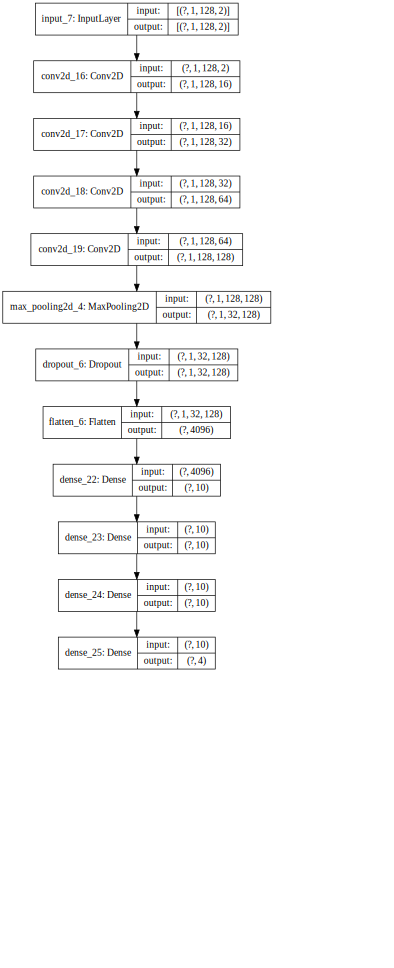

In [0]:
Numero_Datos, uno, alto_2, ancho_2=x_train_2.shape

modelo2 = crearModelo2D(tasa, alpha, numFiltros, tamFiltros, tamPooling, numNeuronas, optimizer, T_entrada_1 = alto_2 , T_entrada_2 = ancho_2 )

#Esta linea muestra un diagrama de la red neuronal.
SVG(model_to_dot(modelo2, show_shapes = True, expand_nested = True, dpi = 50).create(prog='dot', format='svg'))

In [0]:
epocas = 100
batchSize = 5000

#modelo1.compile(loss='sparse_categorical_crossentropy', optimizer = "rmsprop", metrics = ['sparse_categorical_accuracy'])

for i in range(0,1):
  #hist = modelo1.fit(x, y, verbose = 1, validation_data=(x, y), epochs = epocas, batch_size = batchSize)#, class_weight = pesosClases)
  hist = modelo2.fit(x_train_2, y_train, validation_data=(x_test_2, y_test), epochs = epocas, batch_size = batchSize, class_weight = pesosClases)
 
                        

  #SVG(model_to_dot(modelo1, show_shapes = True, expand_nested = True, dpi = 60).create(prog='dot', format='svg'))

Train on 1019232 samples, validate on 254808 samples
Epoch 1/100
1019232/1019232 [==============================] - 31s 30us/sample - loss: 0.5502 - sparse_categorical_accuracy: 0.8324 - val_loss: 0.3916 - val_sparse_categorical_accuracy: 0.8936
Epoch 2/100
1019232/1019232 [==============================] - 29s 29us/sample - loss: 0.3560 - sparse_categorical_accuracy: 0.8995 - val_loss: 0.3160 - val_sparse_categorical_accuracy: 0.9143
Epoch 3/100
1019232/1019232 [==============================] - 32s 32us/sample - loss: 0.2779 - sparse_categorical_accuracy: 0.9234 - val_loss: 0.2572 - val_sparse_categorical_accuracy: 0.9281
Epoch 4/100
1019232/1019232 [==============================] - 32s 32us/sample - loss: 0.2368 - sparse_categorical_accuracy: 0.9362 - val_loss: 0.1926 - val_sparse_categorical_accuracy: 0.9504
Epoch 5/100
1019232/1019232 [==============================] - 29s 29us/sample - loss: 0.2123 - sparse_categorical_accuracy: 0.9436 - val_loss: 0.1796 - val_sparse_categorical

KeyboardInterrupt: ignored

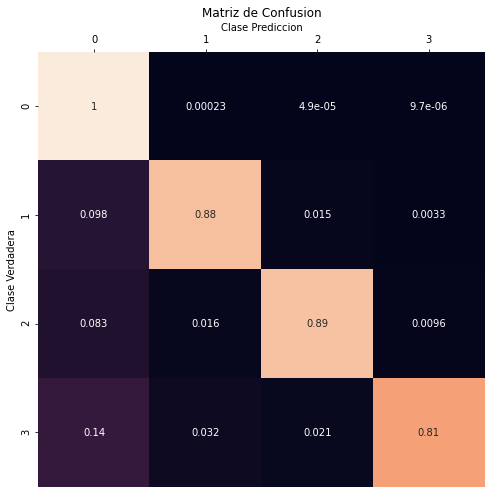

In [0]:
graficarMatrizConfusion(y_true=y_test, y_pred=modelo2.predict_classes(x_test_2))

In [0]:
graficarMatrizConfusion(y_true=y_test, y_pred=modelo2.predict_classes(x_test_2))

# Modelo CNN 1D y 2D

In [0]:
def crearModelo_1D_y_2D(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer, T_entrada_1, T_entrada_2, T_entrada_3):
  # CONV 1D
  capaEntrada_1 = Input(shape = (T_entrada_3,1))

  capa1_1 = Conv1D(pNumFiltros[0], int(pTamFiltros[0]), padding='same', activation = 'relu')(capaEntrada_1)
  pooling1_1 = MaxPooling1D(int(pTamPooling[0]), padding='same')(capa1_1)

  capa2_1 = Conv1D(pNumFiltros[1], int(pTamFiltros[1]), padding='same', activation = 'relu')(pooling1_1)
  pooling2_1 = MaxPooling1D(int(pTamPooling[1]), padding='same')(capa2_1)
  
  flatten_1 = Flatten()(pooling2_1)

  # CONV 2D
  capaEntrada_2 = Input(shape = (1,T_entrada_1,T_entrada_2))

  capa1_2 = Conv2D(pNumFiltros[0], int(pTamFiltros[0]), padding='same', activation = 'relu')(capaEntrada_2)
  pooling1_2 = MaxPooling2D(int(pTamPooling[0]), padding='same')(capa1_2)

  capa2_2 = Conv2D(pNumFiltros[1], int(pTamFiltros[1]), padding='same', activation = 'relu')(pooling1_2)
  pooling2_2 = MaxPooling2D(int(pTamPooling[1]), padding='same')(capa2_2)
  
  flatten_2 = Flatten()(pooling2_2)


  capas = concatenate([flatten_1, flatten_2])

  capas = Dropout(0.5)(capas)
  
  capas = Dense(pNumNeuronas[0], activation='relu')(capas)
  capas = Dense(pNumNeuronas[1], activation='relu')(capas)

  capaSalida = Dense(4, activation='softmax')(capas)

  #modelo = Sequential()
  modelo = Model(inputs = [capaEntrada_1, capaEntrada_2], outputs = capaSalida)

  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()
  
  return modelo

In [0]:
#Esta celda construye los modelos, a partir de los parametros especificados por cada una de las siguientes variables.
#Es el numero de filtros que cada capa convolucional utiliza.
numFiltros = np.array([5, 10, 10, 10, 10, 10])

#Es el tamaño de los filtros utilizados en cada capa convolucional.
tamFiltros = np.array([10, 10, 10, 8, 8, 5])

#Es el tamaño de cada capa de Pooling.
tamPooling = np.array([5, 5, 3, 3, 3, 3])

#Es el numero de neuronas en cada capa de la red neuronal que sigue despues de la parte convolucional.
numNeuronas = np.array([4, 4, 10])

#Es el tipo de optimizador a utilizar.
#Se pueden especificar: "sgd", "adam" o "rmsprop"
optimizer="rmsprop"

#Es la tasa de aprendizaje del optimizador.
tasa = 0.1

#Es el parametro de regularizacion a utilizar.
alpha = 0.01

In [0]:
Numero_Datos, ancho_1, alto_1, =x_train_1.shape
Numero_Datos, uno, alto_2, ancho_2=x_train_2.shape

modelo3 = crearModelo_1D_y_2D(tasa, alpha, numFiltros, tamFiltros, tamPooling, numNeuronas, optimizer,T_entrada_1=alto_2, T_entrada_2=ancho_2, T_entrada_3=ancho_1)

#Esta linea muestra un diagrama de la red neuronal.
SVG(model_to_dot(modelo3, show_shapes = True, expand_nested = True, dpi = 50).create(prog='dot', format='svg'))

In [0]:
epocas = 100
batchSize = 5000

#modelo1.compile(loss='sparse_categorical_crossentropy', optimizer = "rmsprop", metrics = ['sparse_categorical_accuracy'])

for i in range(0,1):
  #hist = modelo1.fit(x, y, verbose = 1, validation_data=(x, y), epochs = epocas, batch_size = batchSize)#, class_weight = pesosClases)
  hist = modelo3.fit([x_train_1,x_train_2], y_train, validation_data=([x_test_1,x_test_2], y_test), epochs = epocas, batch_size = batchSize, class_weight = pesosClases)
 
                        


In [0]:
y_prob = modelo3.predict ([x_test_1,x_test_2])
y_pred_=y_prob.argmax(axis=-1)
graficarMatrizConfusion(y_true=y_test, y_pred=y_pred_)

In [0]:
y_prob = modelo3.predict ([x_test_1,x_test_2])
y_pred_=y_prob.argmax(axis=-1)
graficarMatrizConfusion(y_true=y_test, y_pred=y_pred_)

# Pruebas

In [0]:
import timeit

0.00018936300000405026


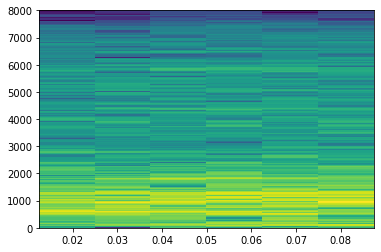

In [0]:
frameData, fs = librosa.load("drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds/00001_6.wav", sr=16000, res_type='kaiser_fast') #Audio seleccionado
start = timeit.timeit()
x,y,ps =  signal.spectrogram(x=frameData[0:1600], fs=fs, window = np.hamming(400), nperseg =400 , nfft = 400, noverlap = int(200) )
S_dB = 10*np.log10(ps)
end = timeit.timeit()

#librosa.display.specshow(S_dB, x_axis='time',
 #                       y_axis='mel', sr=fs,hop_length=int(512/4),
  #                        fmax=8000)

plt.pcolormesh(y,x,S_dB)
hola_1 = (end - start)
print(hola_1)

0.00039489700009198714


0.00020553400008793687

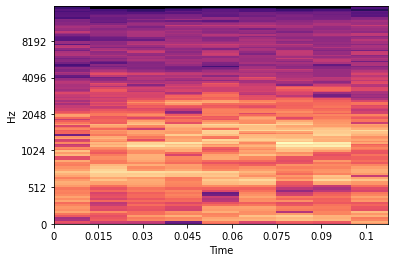

In [0]:
frameData, fs = librosa.load("drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds/00001_6.wav", sr=16000, res_type='kaiser_fast') #Audio seleccionado
start = timeit.timeit()
ps = librosa.feature.melspectrogram(y=frameData[0:1600], sr=fs, n_fft = 400, hop_length = int(200)  )
S_dB = librosa.power_to_db(ps, ref=np.max)
end = timeit.timeit()


hola_2 = (end - start)
librosa.display.specshow(S_dB, x_axis='time',
                        y_axis='mel', sr=fs,hop_length=int(200),
                          fmax=16000)
print(hola_2)
hola_2-hola_1

16000
(13, 81)
[-636.97328165  112.89538908  -55.27235917  -39.35811879  -26.96385187
   14.45549824  -17.89835475   14.50935849  -10.4594912    -2.75587904
  -11.64079737    4.61169338  -23.34611949]
[148.17815613  50.86374099  84.80027241  17.56353333 103.31218257
  39.67582151  38.52561358  55.89333215  26.13029353  23.96737997
  26.78672775  43.68347741  23.70562007]


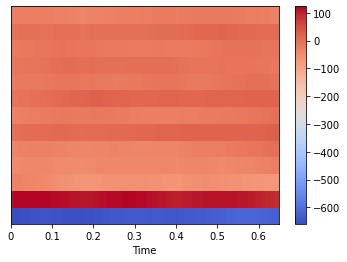

In [0]:
fd= frameData, fs = librosa.load("drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds/00001_6.wav", sr=16000, res_type='kaiser_fast') #Audio seleccionado
ps = librosa.feature.mfcc(y=frameData[0:800], sr=fs, n_mfcc=13, n_fft = 490, hop_length = 10, htk=True )
#ps = preprocessing.scale(ps, axis=1)
print(fs)
print(ps.shape)
print (ps.mean(axis=1))
print (ps.var(axis=1))

#S_dB = librosa.power_to_db(ps, ref=np.max)
librosa.display.specshow(ps, x_axis='time', sr=fs,hop_length=int(512/4))
plt.colorbar()